# Seaborn 'fmri' veri seti üzerinde çalışma

* **fmri** <br>
_Canlılarını beynine bağlanan bir cihaz aracılığıyla gelen sinyallerin yakalanıp, işlenen bir veri setidir._
    * subject: Verilerin toplandığı 14 kişi (14 canlı var ve bunların her biri 76 kez deneye sokuluyor.)
    * timepoint: Zaman noktaları (0-18)
    * event: Verinin nasıl toplandığını ediyor. 
    * region: Beyinde sinyalin toplandığı bölgeyi ifade ediyor.
    * signal: Gelen sinyalin gücü (-0.255- 0.564)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fmri = sns.load_dataset("fmri")
df = fmri.copy() # yeniden deneme

In [4]:
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


# Veri seti üzerinden bilgi edinme


In [5]:
df.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


In [7]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [8]:
df.size

5320

In [9]:
df.shape

(1064, 5)

In [10]:
df.info

<bound method DataFrame.info of      subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]>

In [11]:
df.values

array([['s13', 18, 'stim', 'parietal', -0.017551581538],
       ['s5', 14, 'stim', 'parietal', -0.0808829319505],
       ['s12', 18, 'stim', 'parietal', -0.0810330187333],
       ...,
       ['s12', 7, 'cue', 'frontal', -0.00493910613621],
       ['s11', 7, 'cue', 'frontal', -0.0253667098182],
       ['s0', 0, 'cue', 'parietal', -0.00689923478092]], dtype=object)

In [12]:
df.index

RangeIndex(start=0, stop=1064, step=1)

In [13]:
df.columns

Index(['subject', 'timepoint', 'event', 'region', 'signal'], dtype='object')

# Kategorik değişkenlerle tablo yapmak

In [14]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [15]:
df["subject"].value_counts()

s13    76
s5     76
s12    76
s11    76
s10    76
s9     76
s8     76
s7     76
s6     76
s4     76
s3     76
s2     76
s1     76
s0     76
Name: subject, dtype: int64

In [16]:
df["event"].value_counts()

stim    532
cue     532
Name: event, dtype: int64

In [17]:
df["region"].value_counts()

parietal    532
frontal     532
Name: region, dtype: int64

In [18]:
df.subject.value_counts().values

array([76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76],
      dtype=int64)

In [19]:
df.subject.value_counts().mean()

76.0

In [20]:
df.event.value_counts().mean()

532.0

In [21]:
df.region.value_counts().mean()

532.0

<AxesSubplot:>

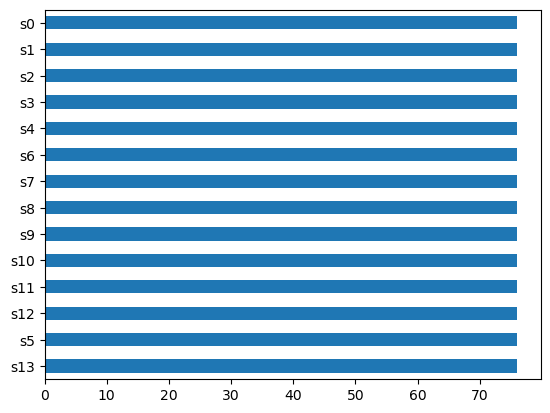

In [22]:
df.subject.value_counts().plot.barh()

<AxesSubplot:>

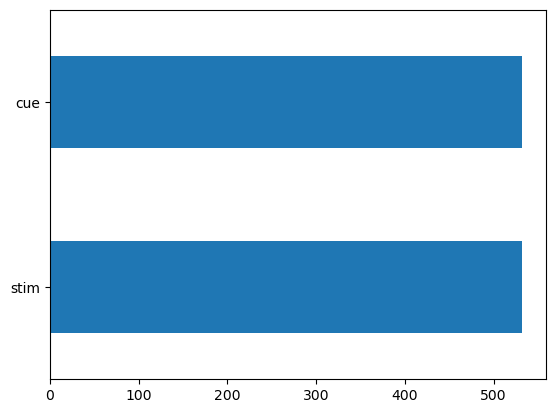

In [23]:
df.event.value_counts().plot.barh()

<AxesSubplot:>

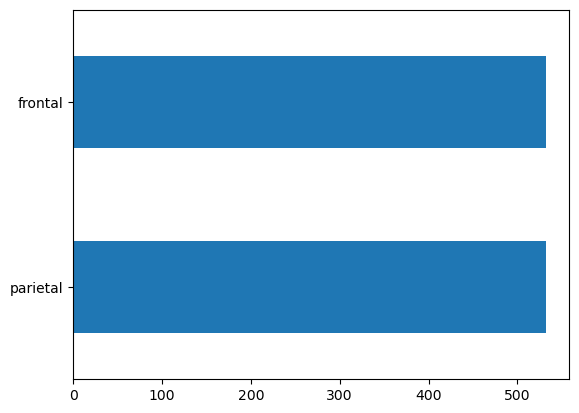

In [24]:
df.region.value_counts().plot.barh()

Text(0.5, 1.0, 'beyindeki bölge')

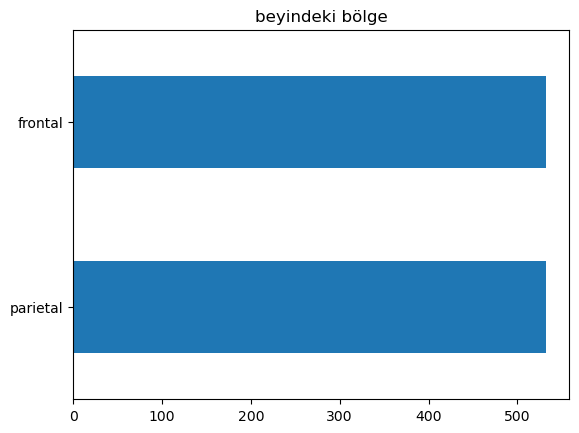

In [25]:
df.region.value_counts().plot.barh().set_title("beyindeki bölge")

Text(0.5, 1.0, 'verinin toplanma yolu')

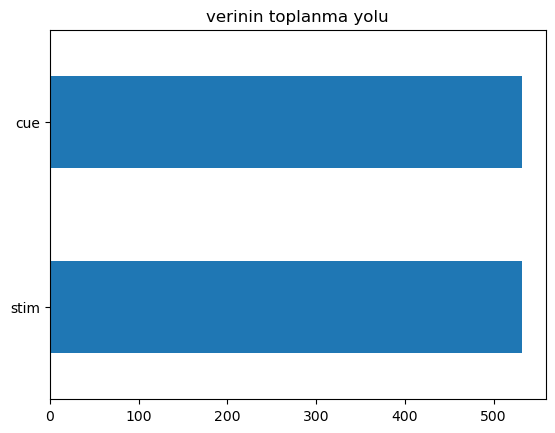

In [26]:
df.event.value_counts().plot.barh().set_title("verinin toplanma yolu")

# Barplot

<AxesSubplot:xlabel='event', ylabel='signal'>

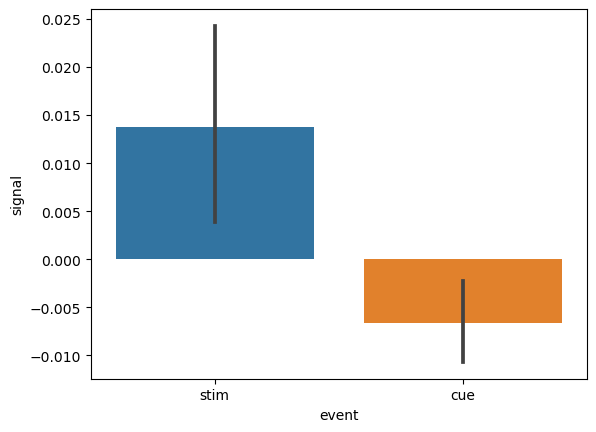

In [27]:
sns.barplot(x = "event", y = "signal", data = df)

<AxesSubplot:xlabel='event', ylabel='timepoint'>

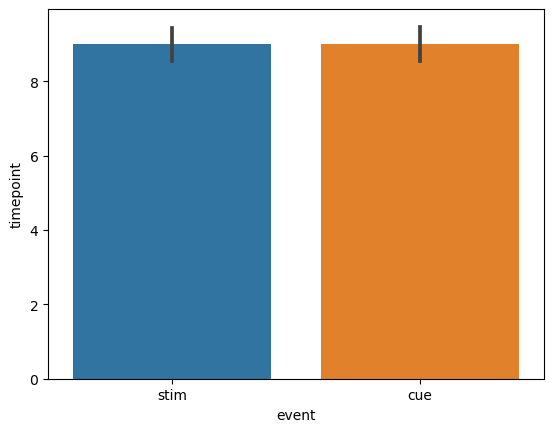

In [28]:
sns.barplot(x = "event", y = "timepoint", data = df)

<AxesSubplot:xlabel='region', ylabel='signal'>

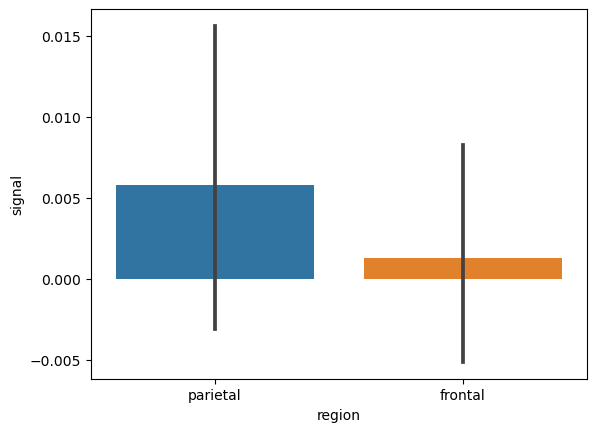

In [29]:
sns.barplot(x = "region", y = "signal", data = df)

<AxesSubplot:xlabel='region', ylabel='timepoint'>

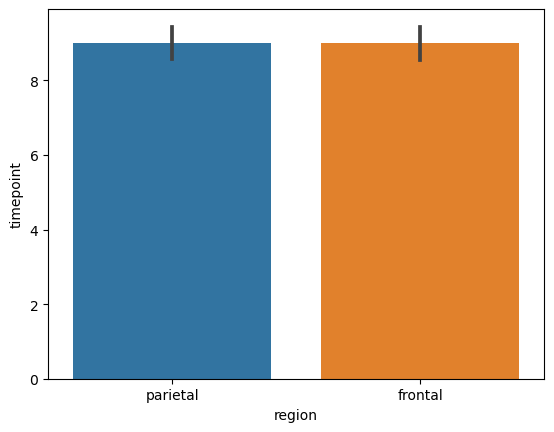

In [30]:
sns.barplot(x = "region", y = "timepoint", data = df)

<AxesSubplot:xlabel='subject', ylabel='timepoint'>

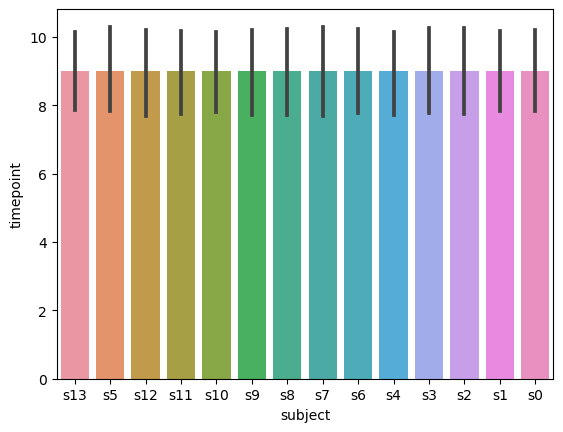

In [31]:
sns.barplot(x = "subject", y = "timepoint", data = df)

<AxesSubplot:xlabel='event', ylabel='signal'>

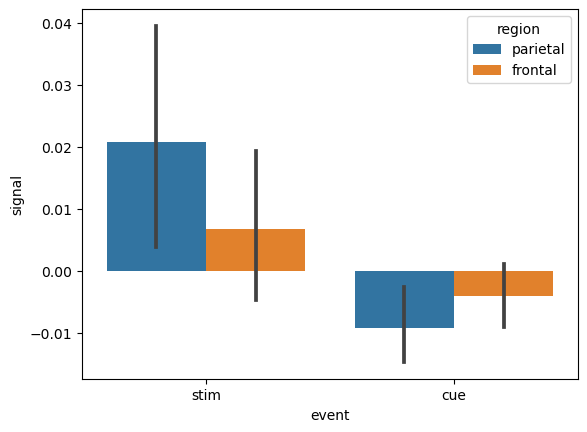

In [32]:
sns.barplot(x = "event", y = "signal", hue = "region", data = df)

<AxesSubplot:xlabel='region', ylabel='timepoint'>

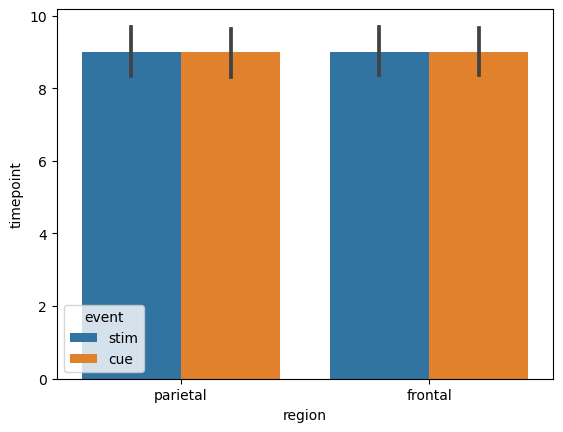

In [33]:
sns.barplot(x = "region", y = "timepoint", hue = "event", data = df)

# Sütun Grafik Çaprazlama

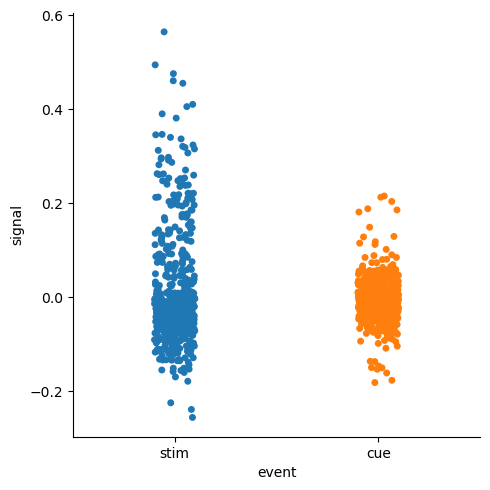

In [35]:
sns.catplot(x = "event", y = "signal", data = df)

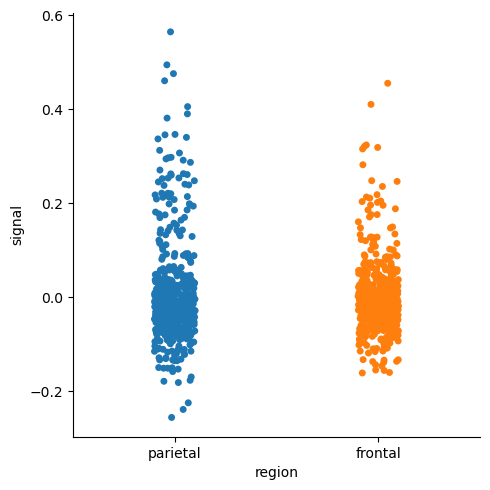

In [36]:
sns.catplot(x = "region", y = "signal", data = df)

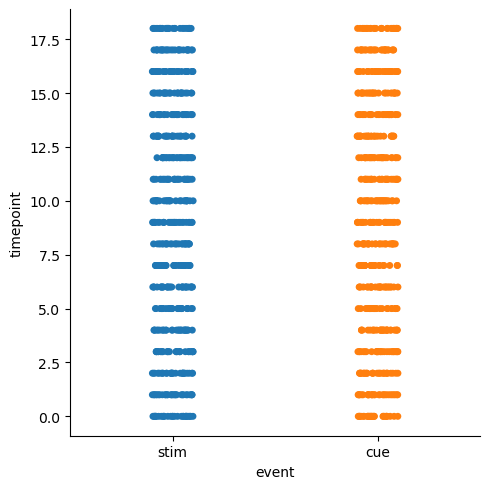

In [37]:
sns.catplot(x = "event",y = "timepoint", data = df)

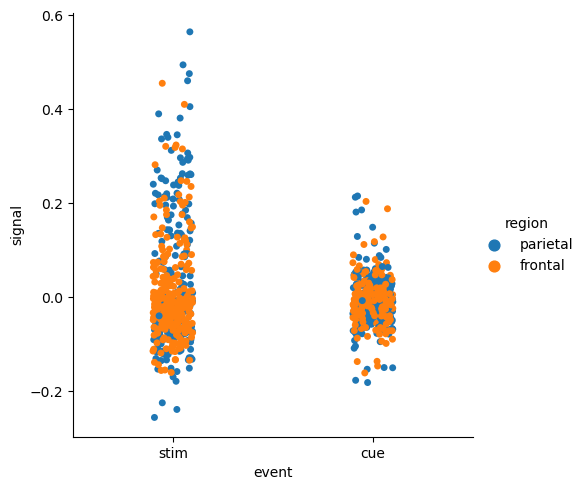

In [38]:
sns.catplot(x = "event", y = "signal", hue = "region", data = df)

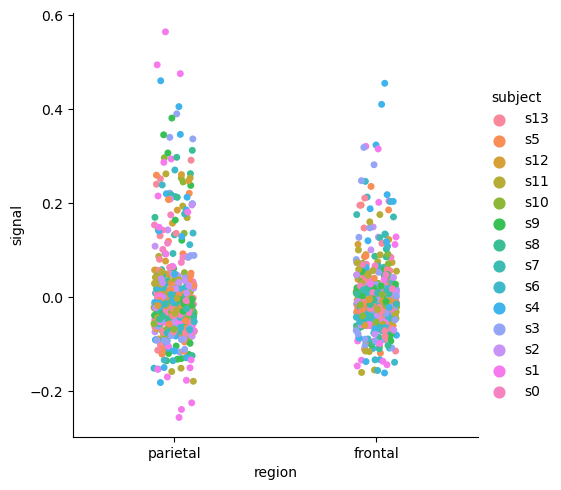

In [39]:
sns.catplot(x = "region", y = "signal", hue = "subject", data = df)

# Groupby

In [40]:
df.groupby(["region"]).sum()

,timepoint,signal
region,,
frontal,4788,0.690580
parietal,4788,3.075734


In [41]:
df.groupby(["event"]).sum()

,timepoint,signal
event,,
cue,4788,-3.547841
stim,4788,7.314155


In [42]:
df.groupby(["subject"]).sum()

,timepoint,signal
subject,,
s0,684,0.290815
s1,684,0.758322
s10,684,0.512530
s11,684,-0.203249
s12,684,0.078266
s13,684,0.292817
s2,684,-0.146404
s3,684,0.588908
s4,684,0.883508


In [43]:
df.groupby(["event"]).mean()

,timepoint,signal
event,,
cue,9.0,-0.006669
stim,9.0,0.013748


In [44]:
df.groupby(["event"]).std()

,timepoint,signal
event,,
cue,5.482381,0.047752
stim,5.482381,0.123179


In [45]:
df.groupby(["event"]).mean()

,timepoint,signal
event,,
cue,9.0,-0.006669
stim,9.0,0.013748


In [46]:
df.groupby(["event"]).std()

,timepoint,signal
event,,
cue,5.482381,0.047752
stim,5.482381,0.123179


In [47]:
df.groupby(["event"]).corr()

timepoint    signal
event                               
cue   timepoint   1.000000 -0.106335
      signal     -0.106335  1.000000
stim  timepoint   1.000000 -0.381327
      signal     -0.381327  1.000000

In [48]:
df.groupby(["event","region"]).mean()

timepoint    signal
event region                       
cue   frontal         9.0 -0.004080
      parietal        9.0 -0.009258
stim  frontal         9.0  0.006676
      parietal        9.0  0.020821

In [49]:
df.groupby(["event", "region"]).sum()

timepoint    signal
event region                       
cue   frontal        2394 -1.085219
      parietal       2394 -2.462622
stim  frontal        2394  1.775799
      parietal       2394  5.538356

# Histogram ve Yoğunluk

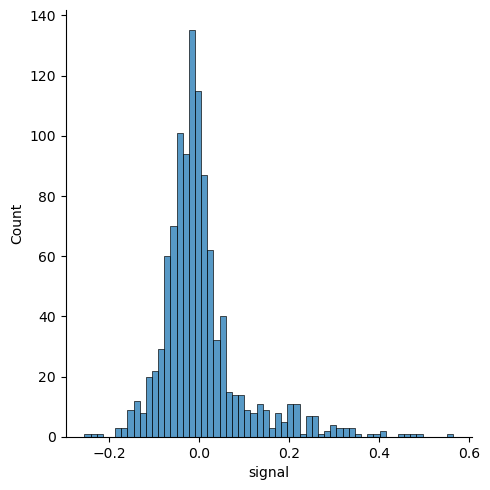

In [50]:
sns.displot(df.signal, kde = False)

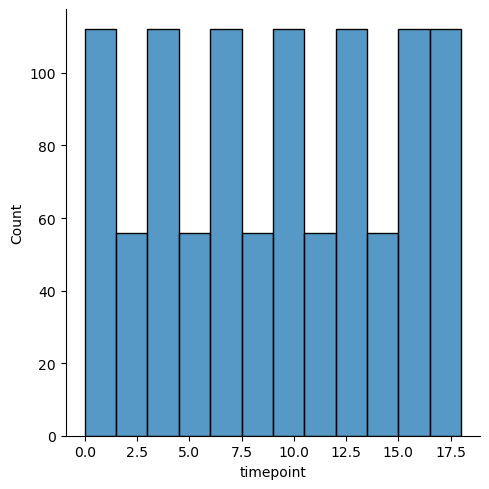

In [51]:
sns.displot(df.timepoint, kde = False)

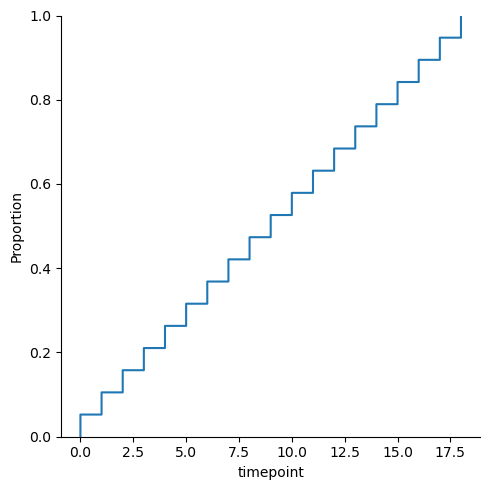

In [52]:
sns.displot(data = df, x = "timepoint", kind = "ecdf")

c:\Users\Osman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='signal', ylabel='Density'>

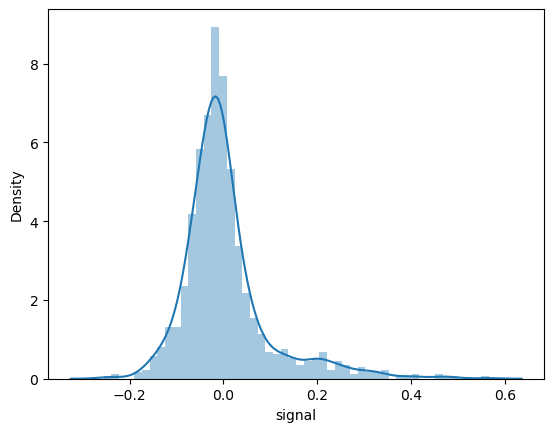

In [53]:
sns.distplot(df.signal)

c:\Users\Osman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='signal', ylabel='Density'>

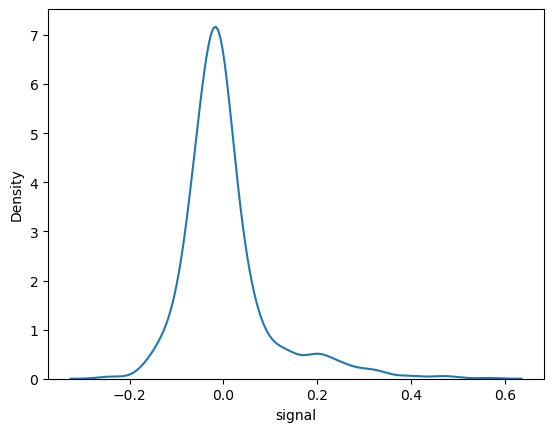

In [54]:
sns.distplot(df.signal, hist = False)

<AxesSubplot:xlabel='signal', ylabel='Density'>

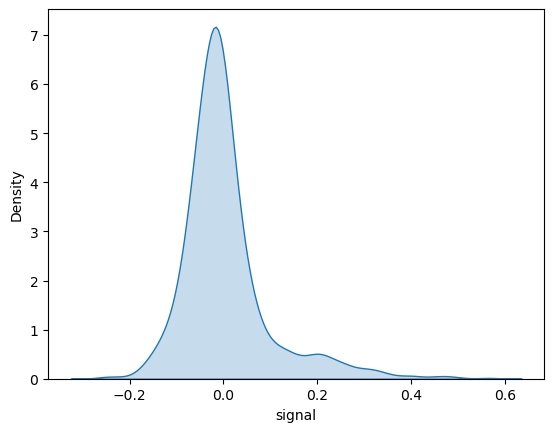

In [55]:
sns.kdeplot(df.signal, shade = True)

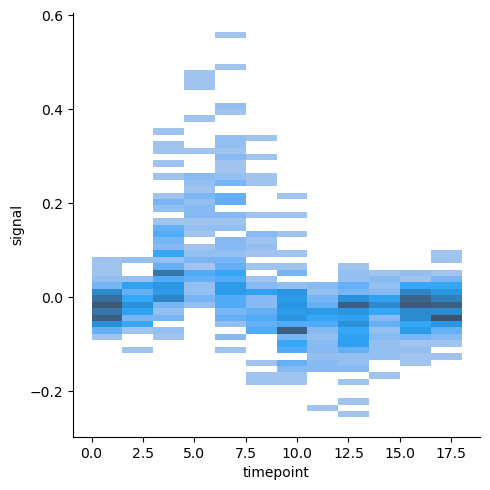

In [56]:
sns.displot(data = df, x = "timepoint", y = "signal")

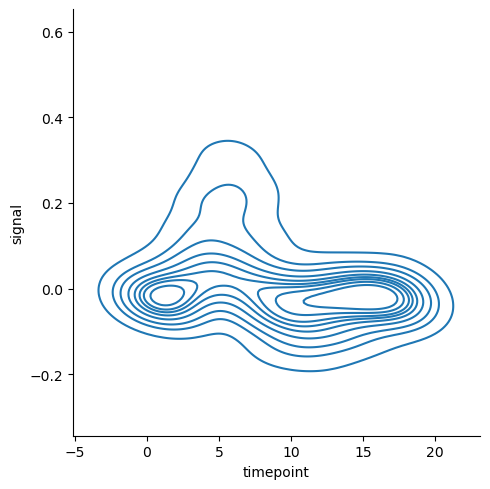

In [57]:
sns.displot(data = df, x = "timepoint", y = "signal", kind = "kde")

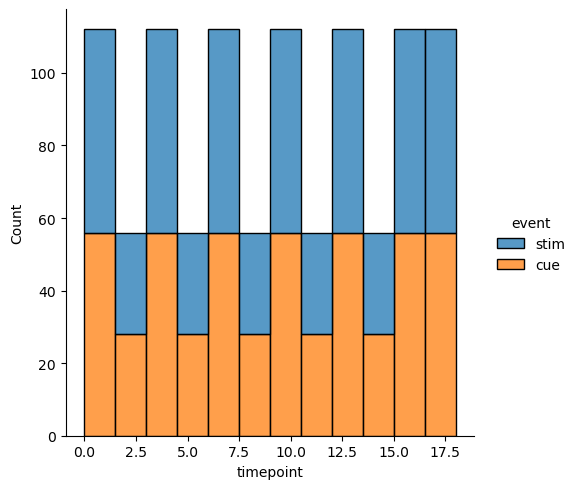

In [58]:
sns.displot(data = df, x = "timepoint", hue = "event", multiple = "stack")

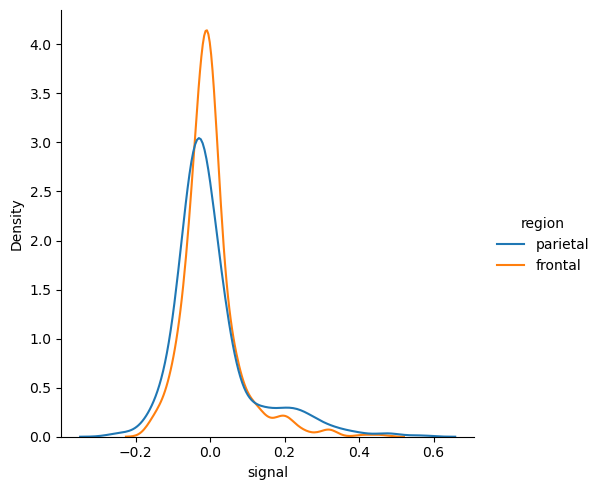

In [59]:
sns.displot(data = df, x = "signal", hue = "region", kind = "kde")

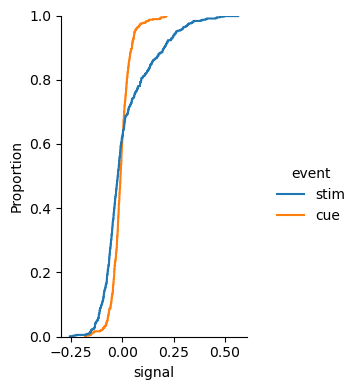

In [60]:
sns.displot(data = df, x = "signal", hue = "event", kind = "ecdf", height = 4, aspect = .7)

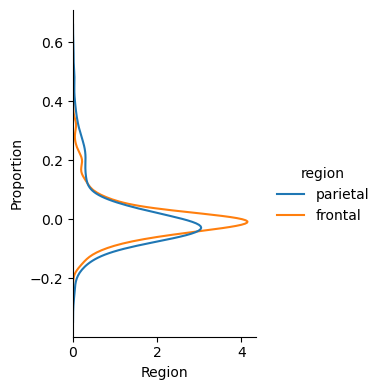

In [61]:
g = sns.displot(data = df, y = "signal", hue = "region", kind = "kde", height = 4, aspect = .7)
g.set_axis_labels("Region", "Proportion")
g.set_titles("Experience")

# Boxplot

<AxesSubplot:xlabel='timepoint'>

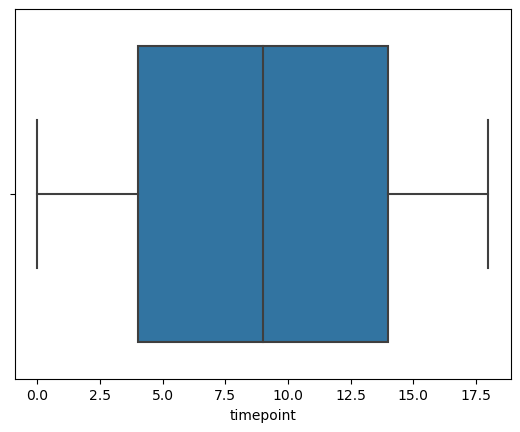

In [62]:
sns.boxplot(x = df.timepoint)

<AxesSubplot:xlabel='signal'>

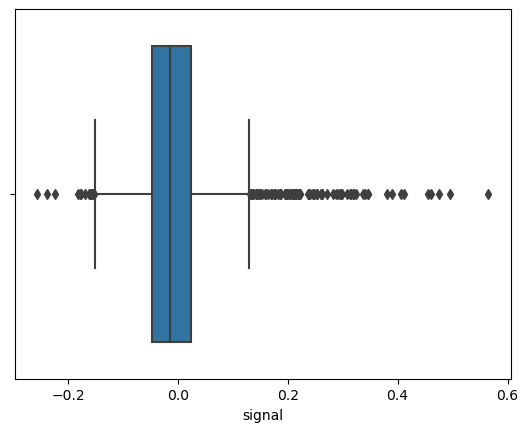

In [63]:
sns.boxplot(x = df.signal)

<AxesSubplot:xlabel='event', ylabel='signal'>

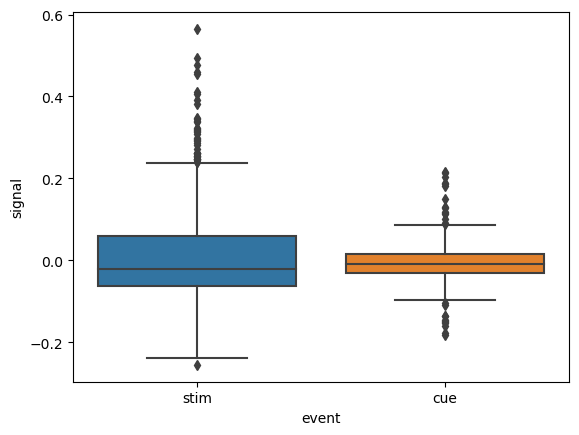

In [64]:
sns.boxplot(x = "event", y = "signal", data = df)

<AxesSubplot:xlabel='region', ylabel='timepoint'>

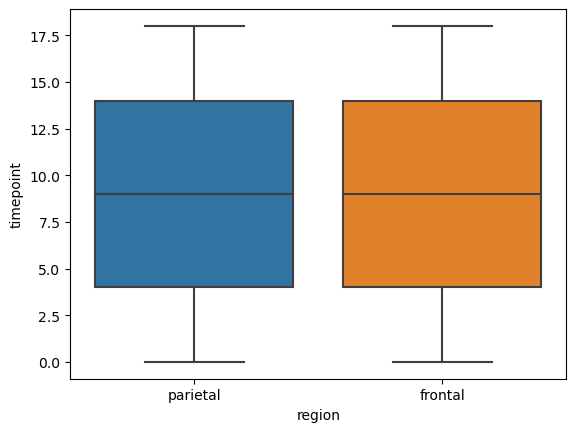

In [65]:
sns.boxplot(x = "region", y = "timepoint", data = df)

<AxesSubplot:xlabel='region', ylabel='signal'>

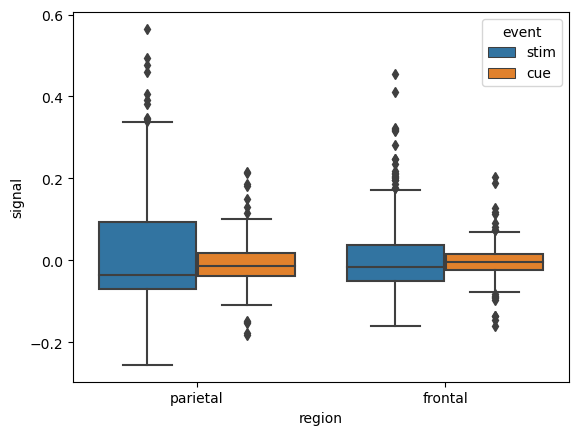

In [66]:
sns.boxplot(x = "region", y = "signal", hue = "event", data = df)

# Violin Grafik

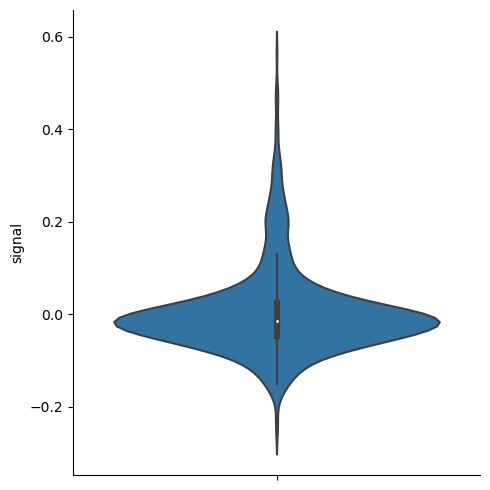

In [67]:
sns.catplot(y = "signal", kind = "violin", data = df)

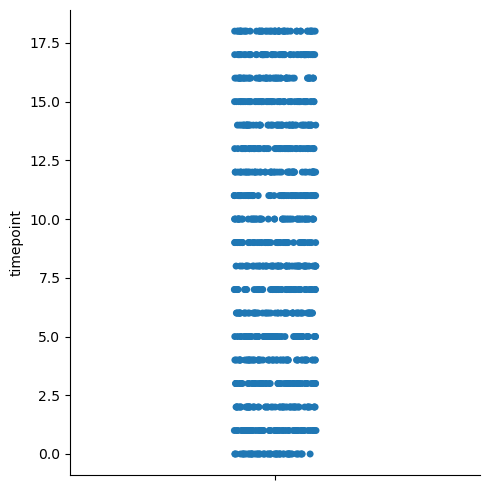

In [68]:
sns.catplot(y = "timepoint", data = df)

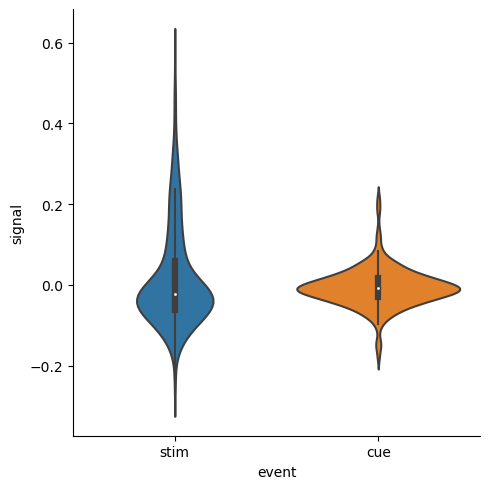

In [69]:
sns.catplot(x = "event", y = "signal",kind = "violin", data = df)

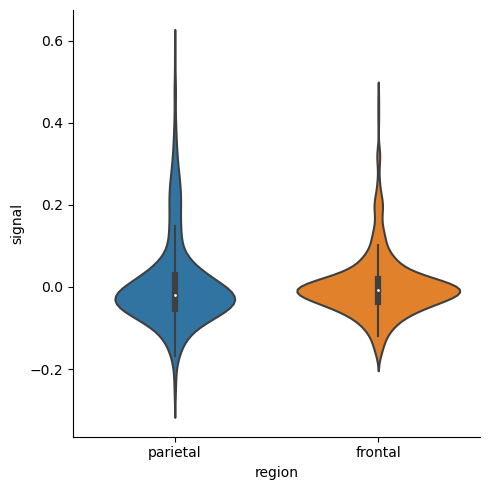

In [70]:
sns.catplot(x = "region", y = "signal", kind = "violin", data = df)

# Relplot

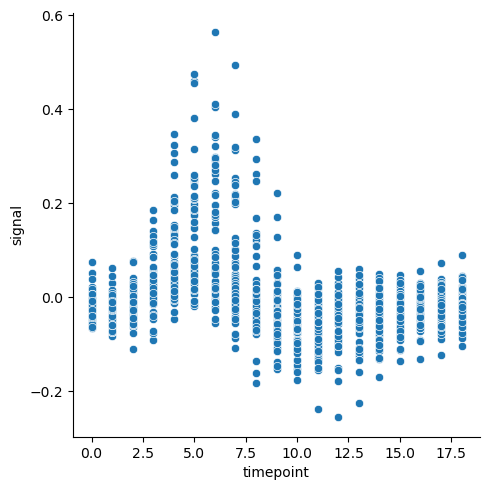

In [71]:
sns.relplot(x = "timepoint", y = "signal", data = df)

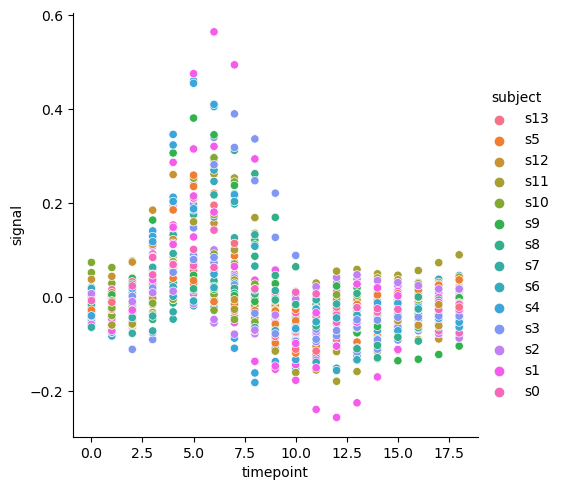

In [72]:
sns.relplot(x = "timepoint", y = "signal", hue = "subject", data = df)

# ScatterPlot

In [73]:
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<AxesSubplot:xlabel='subject', ylabel='signal'>

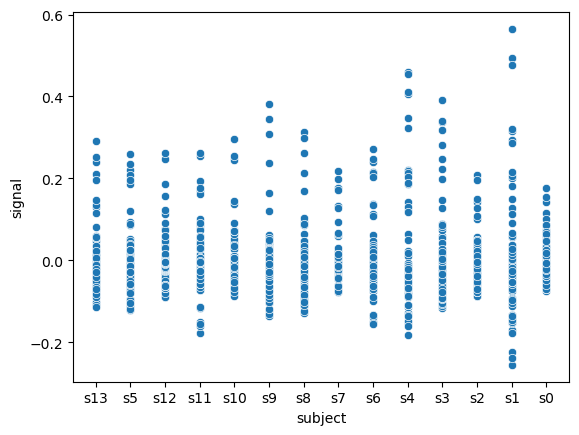

In [85]:
sns.scatterplot(x = "subject", y = "signal", data = df)

<AxesSubplot:xlabel='subject', ylabel='signal'>

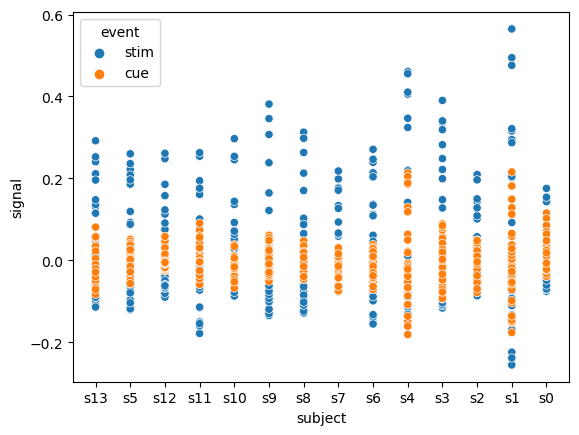

In [86]:
sns.scatterplot(x = "subject", y = "signal",hue = "event", data = df)

<AxesSubplot:xlabel='subject', ylabel='signal'>

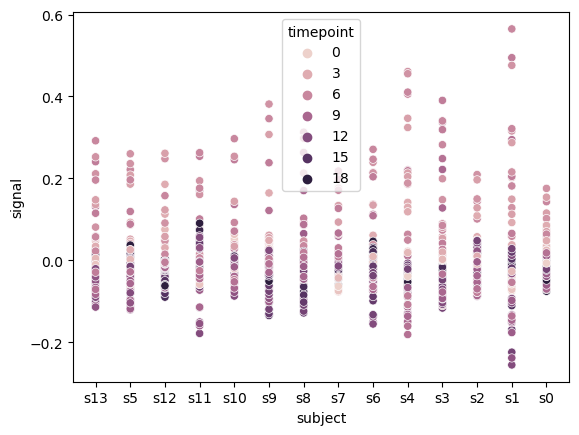

In [88]:
sns.scatterplot(x = "subject", y = "signal", hue = "timepoint", data = df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

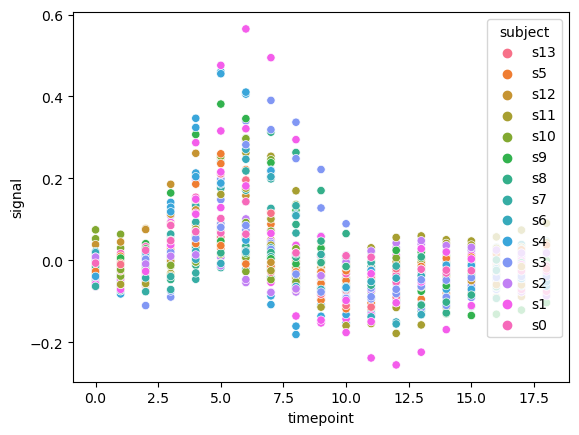

In [91]:
sns.scatterplot(x = "timepoint", y = "signal", hue = "subject", data = df)

# Matris Grafikler

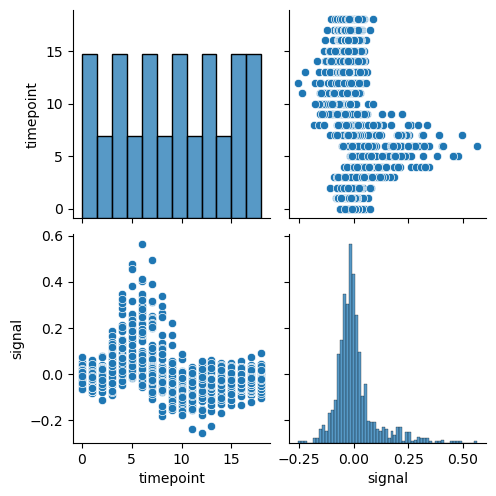

In [92]:
sns.pairplot(data = df)

# Isı Haritası

In [93]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [94]:
df_num = df.select_dtypes(include = ["float64", "int64"]) # ısı haritası için sayılardan oluşan bir tablo lazım
df_num.head()

,timepoint,signal
0,18,-0.017552
1,14,-0.080883
2,18,-0.081033
3,18,-0.046134
4,18,-0.037970


<AxesSubplot:>

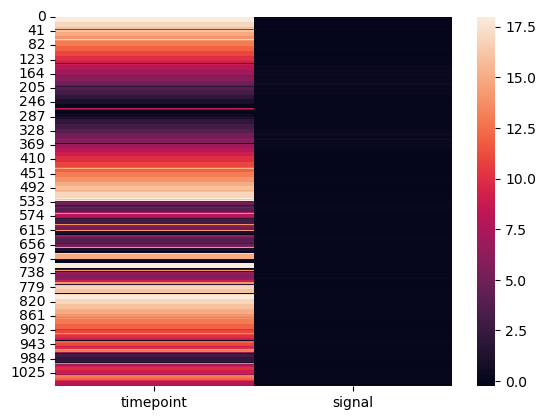

In [95]:
sns.heatmap(data = df_num) # çok da yararlı bir grafik olmadı